In [220]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [221]:
# Load datasets
train_data = pd.read_csv('Titanic_train.csv')

# Exploratory Data Analysis (EDA):

In [222]:
# Display the first few rows
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
# Display summary statistics for numerical columns
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [224]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [225]:
# Check for missing values in each column
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
# Columns to drop from the dataset
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']  

In [227]:
# Drop the columns
train_data = train_data.drop(columns=columns_to_drop)

In [228]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [229]:
# Selects numerical columns (float64 and int64 types)
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

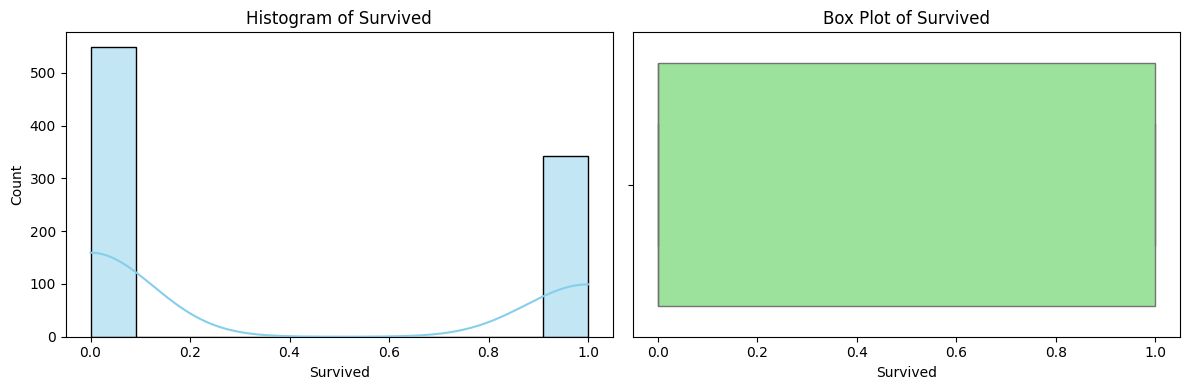

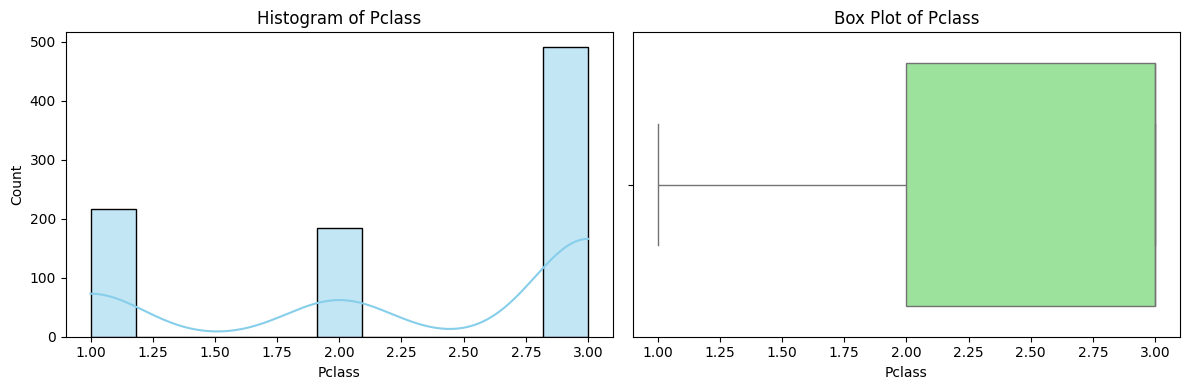

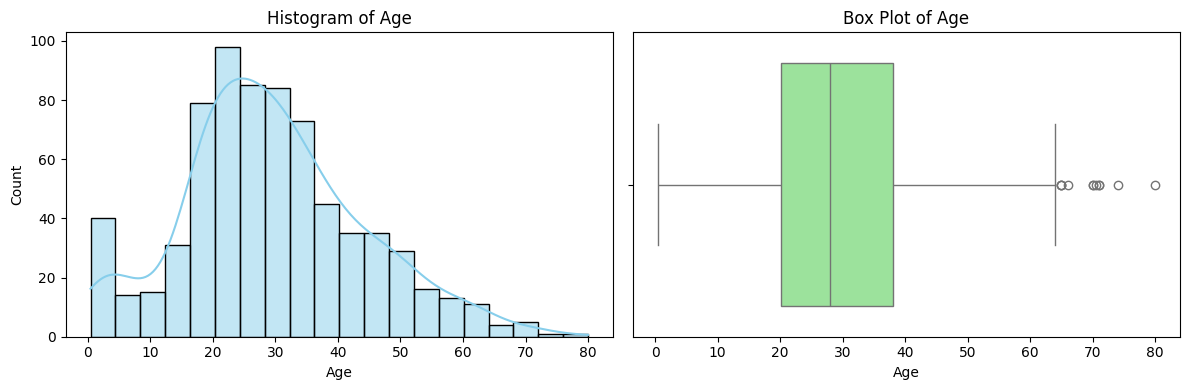

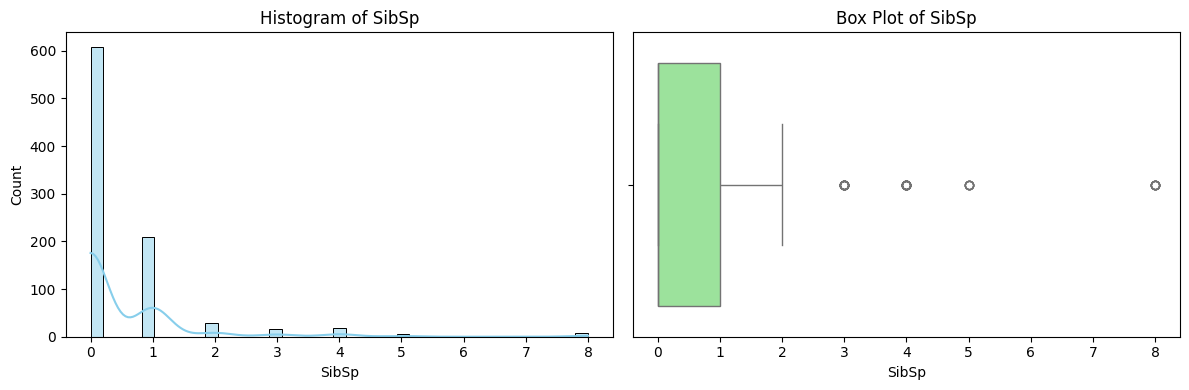

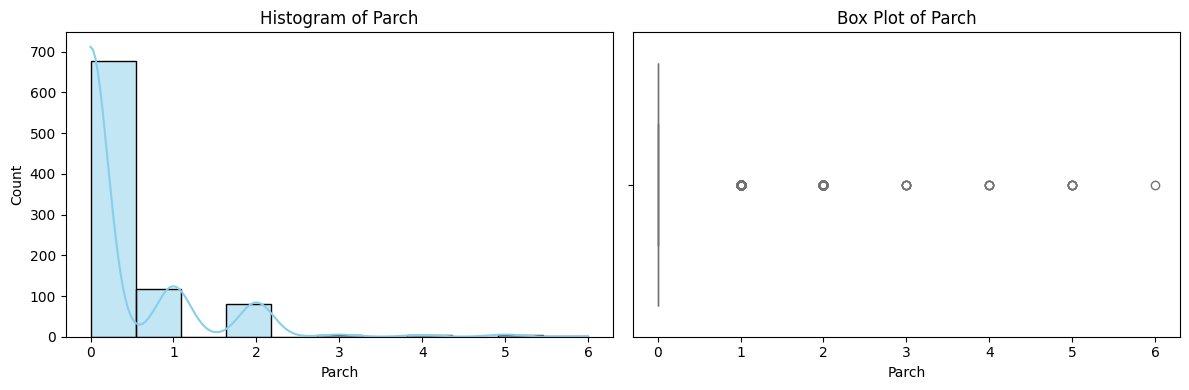

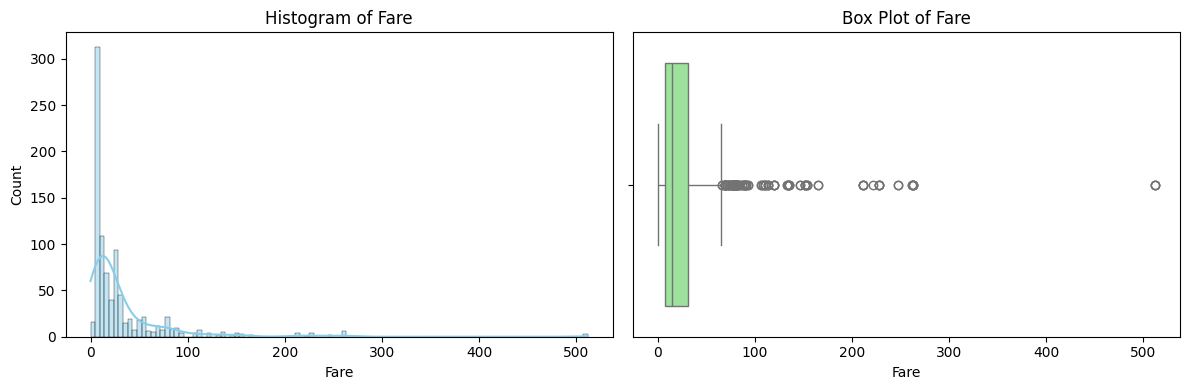

In [230]:
for column in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns
    
    # Histogram
    sns.histplot(train_data[column], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {column}')
    
    # Box Plot
    sns.boxplot(x=train_data[column], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Box Plot of {column}')
    
    plt.tight_layout()
    plt.show()

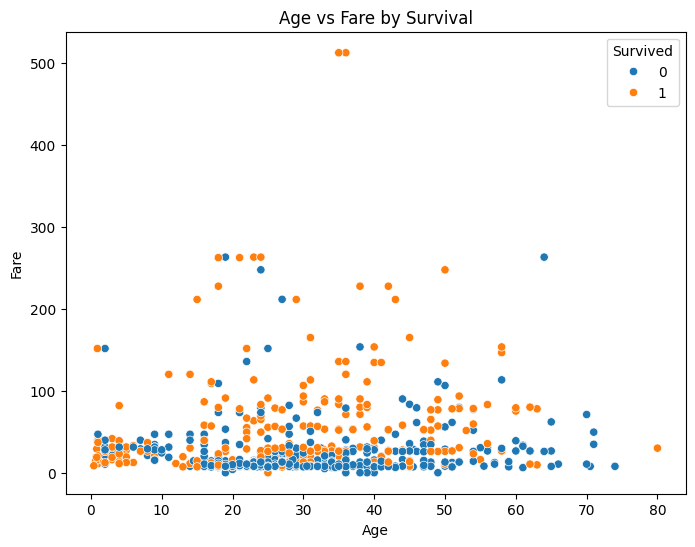

In [231]:
# Scatter plot showing the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Age vs Fare by Survival')
plt.show()

<Figure size 1100x700 with 0 Axes>

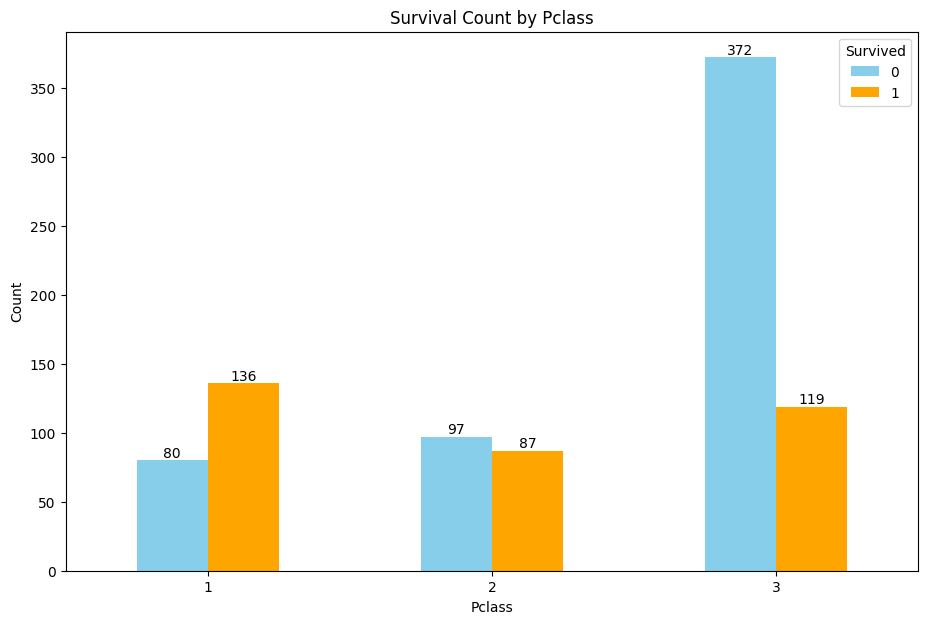

<Figure size 1100x700 with 0 Axes>

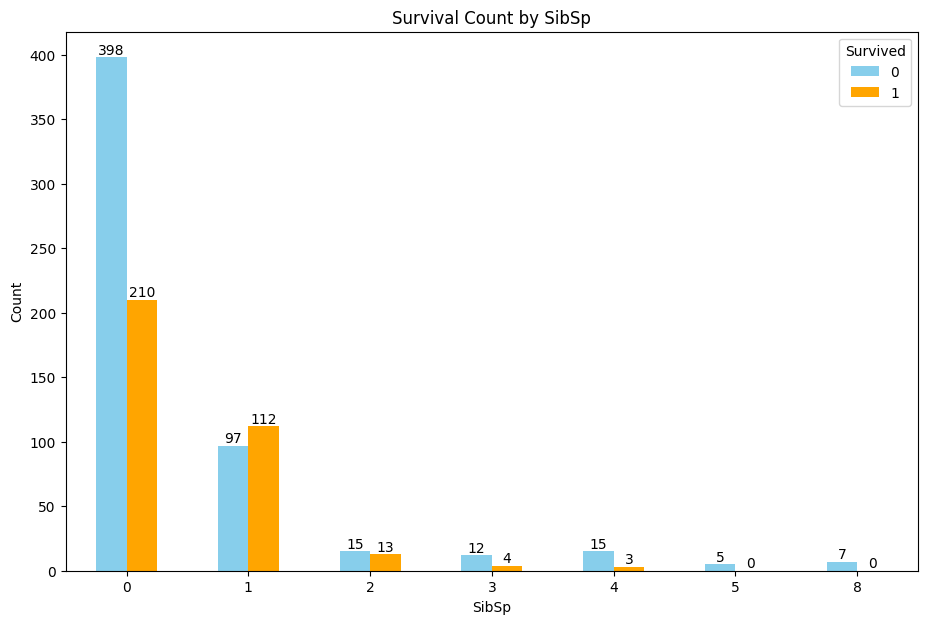

<Figure size 1100x700 with 0 Axes>

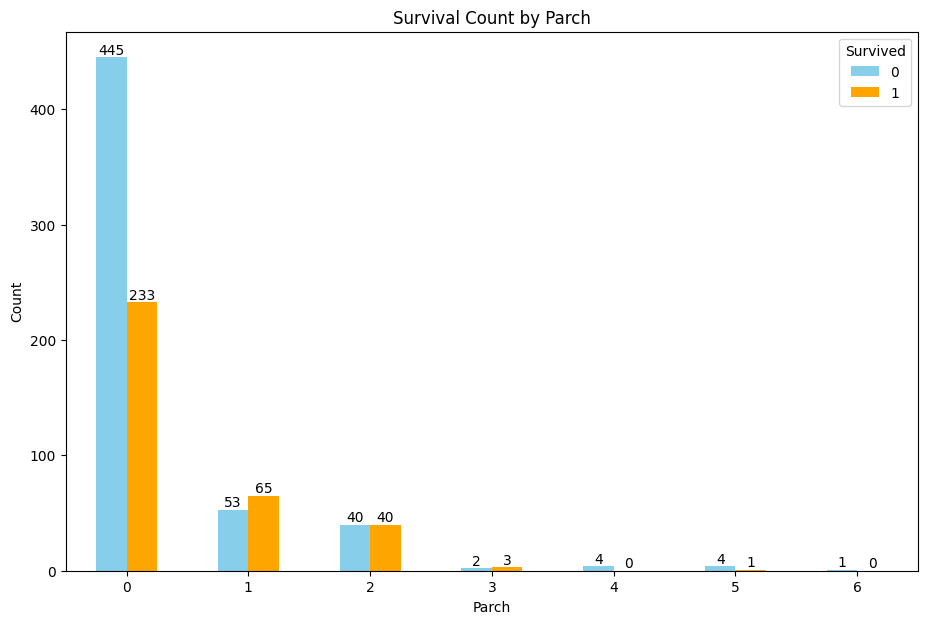

<Figure size 1100x700 with 0 Axes>

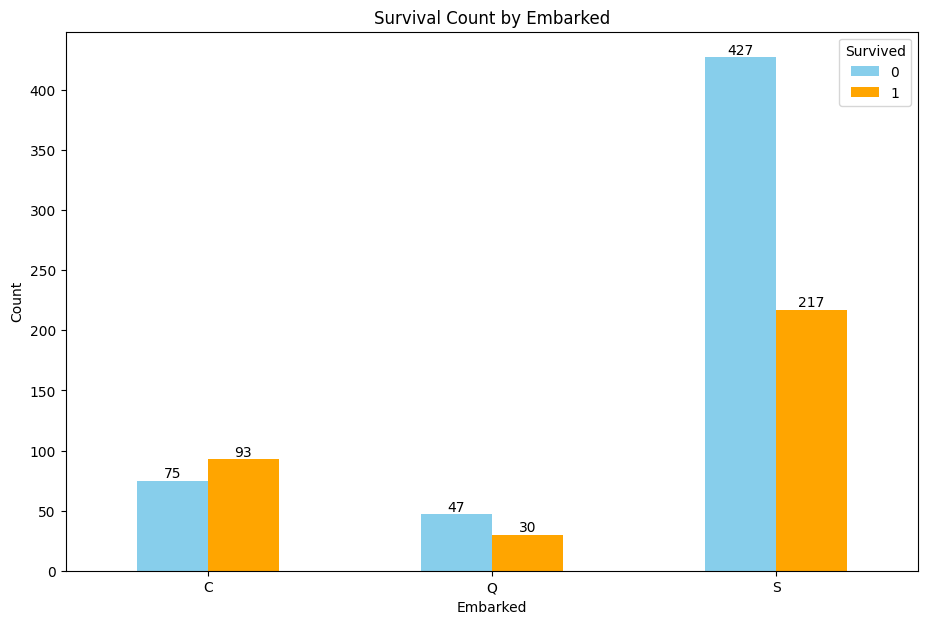

In [232]:
features = ['Pclass', 'SibSp', 'Parch','Embarked']

for feature in features:
    # Create crosstab
    ct = pd.crosstab(train_data[feature], train_data['Survived'])
    
    # Plot
    plt.figure(figsize=(11, 7))
    ax = ct.plot(kind='bar', figsize=(11, 7), color=['skyblue', 'orange'])
    plt.title(f'Survival Count by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Add data labels
    for container in ax.containers:
        ax.bar_label(container)
    # Display the plot
    plt.show()

# Data Preprocessing:

In [233]:
# Check for missing values
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [235]:
# Handle missing values
train_data['Pclass'].fillna(train_data['Pclass'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [236]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

In [237]:
# Convert categorical variables into dumm variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True,dtype= float)

In [238]:
scaler = MinMaxScaler()

# Fit and transform the specified columns
train_data[['Pclass','Age','Fare']] = scaler.fit_transform(train_data[['Pclass','Age','Fare']])

In [239]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Embarked_2
0,0,1.0,0.271174,1,0,0.014151,1.0,0.0,1.0
1,1,0.0,0.472229,1,0,0.139136,0.0,0.0,0.0
2,1,1.0,0.321438,0,0,0.015469,0.0,0.0,1.0
3,1,0.0,0.434531,1,0,0.103644,0.0,0.0,1.0
4,0,1.0,0.434531,0,0,0.015713,1.0,0.0,1.0


# Building Predictive Models:

In [240]:
# Define features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [241]:
# Split data
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state= 43)

# XGBoost 

In [245]:
# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_model.fit(X_train, y_train)

C:\Users\sanke\anaconda3\envs\notebook\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:50:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [243]:
# Make predictions
xgb_preds = xgb_model.predict(X_test)

In [244]:
# Evaluate performance
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds)

print(f"XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1 Score: {xgb_f1}")

XGBoost - Accuracy: 0.8100558659217877, Precision: 0.8301886792452831, Recall: 0.6376811594202898, F1 Score: 0.7213114754098361


# LightGBM 

In [246]:
# Define the parameter grid
params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 8, 12],
    'learning_rate': [0.1, 0.01],
    'num_leaves': [31, 50],
    'boosting_type': ['gbdt'],
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'subsample': [0.8, 1.0],
    'max_bin': [127, 255]
}

# Initialize the LightGBM model
model = lgb.LGBMClassifier()

# Initialize GridSearchCV
grd = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=3)

# Fit the GridSearchCV object to your training data
# Assuming you have X_train and y_train as your training data
grd.fit(X_train, y_train)  # This line is crucial

# Now you can access the best parameters
grd.best_params_   # best parameter

[LightGBM] [Info] Number of positive: 182, number of negative: 292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383966 -> initscore=-0.472747
[LightGBM] [Info] Start training from score -0.472747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_bin': 127,
 'max_depth': 4,
 'metric': 'binary_logloss',
 'n_estimators': 100,
 'num_leaves': 31,
 'objective': 'binary',
 'subsample': 0.8}

In [247]:
# Retrieve the best estimator from the GridSearchCV results
final_model2 = grd.best_estimator_

In [248]:
# Make predictions
lgbm_preds = final_model2.predict(X_test)

In [249]:
# Evaluate performance
lgbm_accuracy = accuracy_score(y_test, lgbm_preds)
lgbm_precision = precision_score(y_test, lgbm_preds)
lgbm_recall = recall_score(y_test, lgbm_preds)
lgbm_f1 = f1_score(y_test, lgbm_preds)
print(f"LightGBM - Accuracy: {lgbm_accuracy}, Precision: {lgbm_precision}, Recall: {lgbm_recall}, F1 Score: {lgbm_f1}")

LightGBM - Accuracy: 0.8044692737430168, Precision: 0.8695652173913043, Recall: 0.5797101449275363, F1 Score: 0.6956521739130435


# Comparative Analysis:

      Metric  LightGBM   XGBoost
0   Accuracy  0.804469  0.810056
1  Precision  0.869565  0.830189
2     Recall  0.579710  0.637681
3   F1 Score  0.695652  0.721311


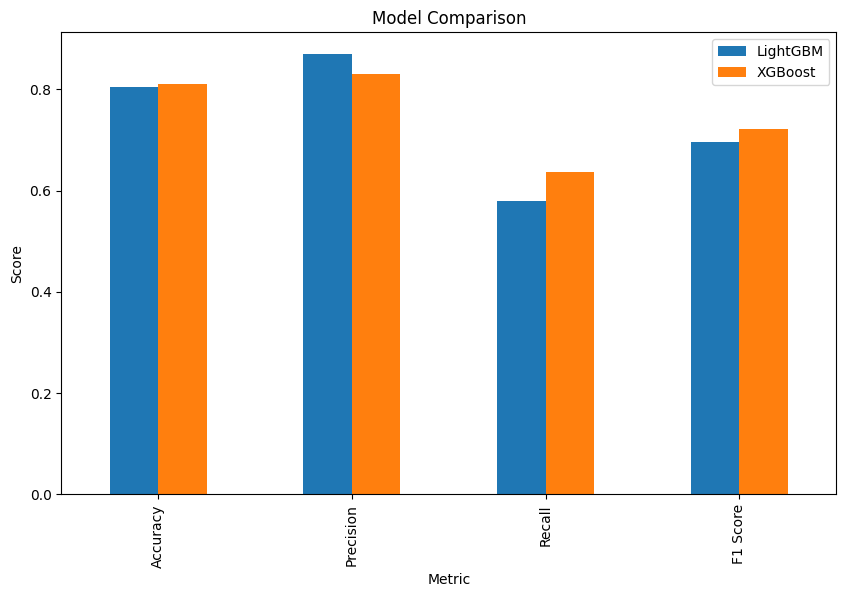

In [252]:
# Compile results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LightGBM': [lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
})

print(results)

# Visualize results
results.set_index('Metric').plot(kind='bar', figsize=(10, 6), title="Model Comparison")
plt.ylabel('Score')
plt.show()

# Testing Data

In [253]:
test_data = pd.read_csv('Titanic_test.csv')

In [254]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [255]:
# Drop the columns
test_data = test_data.drop(columns=columns_to_drop)

In [256]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [257]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [259]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)   

In [260]:
# Convert categorical variables into dummy/indicator variables
test_data= pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True,dtype= float)
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0


In [262]:
# pre testing dataset
pred_test = final_model2.predict(test_data)        
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [263]:
# Convert pred_test to a DataFrame
pred_test_df = pd.DataFrame(pred_test, columns=['Prediction'])
test_with_predictions = test_data.copy()  #  copy of the test DataFrame
test_with_predictions['Prediction'] = pred_test_df
test_with_predictions.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Prediction
0,3,34.5,0,0,7.8292,1.0,1.0,0.0,0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0,0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0,0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0,0
